<a href="https://colab.research.google.com/github/FGalvao77/Analise-de-sentimentos-de-dados-textuais---IMDB-Dataset/blob/main/An%C3%A1lise_de_sentimentos_de_dados_textuais_IMDB_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de sentimentos de dados textuais - `IMDB Dataset`**

---



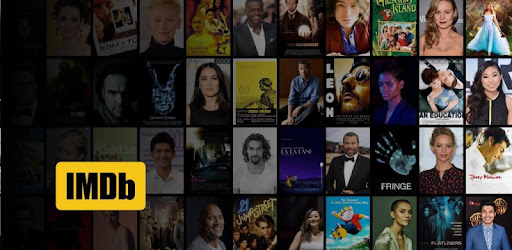

- https://pt.wikipedia.org/wiki/IMDb

## **Importando o conjunto de dados**

In [ ]:
# importando o conjunto de dados
!wget https://raw.githubusercontent.com/bestvater/misc/master/IMDB%20Dataset.csv

--2021-12-10 12:53:23--  https://raw.githubusercontent.com/bestvater/misc/master/IMDB%20Dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66212309 (63M) [text/plain]
Saving to: ‘IMDB Dataset.csv.2’

IMDB Dataset.csv.2  100%[===================>]  63.14M   126MB/s    in 0.5s    

2021-12-10 12:53:23 (126 MB/s) - ‘IMDB Dataset.csv.2’ saved [66212309/66212309]



In [ ]:
# visualizando o diretório principal
%ls

 bow.pkl            'IMDB Dataset.csv.1'   model_1.pkl
'IMDB Dataset.csv'  'IMDB Dataset.csv.2'   sample_data/


In [ ]:
# visualizando as primeiras linhas do conjunto de dados
!head 'IMDB Dataset.csv'

review,sentiment
"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show

In [ ]:
# visualizando as últimas linhas do conjunto de dados
!tail 'IMDB Dataset.csv'

"Lame, lame, lame!!! A 90-minute cringe-fest that's 89 minutes too long. A setting ripe with atmosphere and possibility (an abandoned convent) is squandered by a stinker of a script filled with clunky, witless dialogue that's straining oh-so-hard to be hip. Mostly it's just embarrassing, and the attempts at gonzo horror fall flat (a sample of this movie's dialogue: after demonstrating her artillery, fast dolly shot to a closeup of Barbeau's vigilante charactershe: `any questions?' hyuck hyuck hyuck). Bad acting, idiotic, homophobic jokes and judging from the creature effects, it looks like the director's watched `The Evil Dead' way too many times. <br /><br />I owe my friends big time for renting this turkey and subjecting them to ninety wasted minutes they'll never get back. What a turd.",negative
"Les Visiteurs, the first movie about the medieval time travelers was actually funny. I like Jean Reno as an actor, but there was more. There were unexpected twists, funny situations and of

In [95]:
# instanciando o caminho do conjunto de dados
PATH = 'https://raw.githubusercontent.com/bestvater/misc/master/IMDB%20Dataset.csv'

In [96]:
# biblioteca para ignorar mensagens de alerta
import warnings
warnings.filterwarnings('ignore')

In [97]:
# biblioteca para modelagem de dados
import pandas as pd

In [100]:
# configurando a quantidade de casas decimais que serão exibidas
pd.options.display.float_format='{:,.4f}'.format

## **Análise exploratória do conjunto de dados**

In [101]:
# instanciando o conjunto de dados na variável "df"
df = pd.read_csv(PATH)

# visualizando as 5 primeiras linhas
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [102]:
# informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [103]:
# contabilizando as instâncias únicas presente na variável alvo "sentiment"
df['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

In [104]:
# biblioteca para visualização gráfica
import seaborn as sns

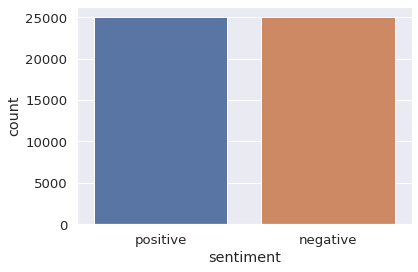

In [105]:
# de forma gráfica, visualizando a distribuição das instâncias da variável alvo
sns.set(style='darkgrid', font_scale = 1.2)
sns.countplot(df.sentiment);

In [106]:
# contabilizando a presença de valores "NaN"
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [107]:
# contabilizando a presença de valores nulos da variável alvo
df['sentiment'].isnull().sum()

0

In [108]:
# visualizando o primeiro comentário
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [109]:
# estatística do conjunto de dados
df.describe().T

,count,unique,top,freq
review,50000,49582,Loved today's show!!! It was a variety and not...,5
sentiment,50000,2,negative,25000


## **Pré-processamento do conjunto de dados**

In [117]:
# particionando os dados em duas partes: - um parte para modelagem e, outra para teste final
comments = df.sample(frac=0.99, random_state=786)
data_test = df.drop(comments.index)

comments.reset_index(drop=True, inplace=True)
data_test.reset_index(drop=True, inplace=True)

print('Dados para modelagem: ' + str(comments.shape))
print('Dados para teste do modelo: ' + str(data_test.shape))

Dados para modelagem: (49500, 2)
Dados para teste do modelo: (500, 2)


**Removendo tags HTML**

In [118]:
# biblioteca de expressão regular para remoção de tags HTML
import re   

# criando uma função para remoção das tags
def cleaning_text(text):
    text_clean = re.compile(r'<.*?>')
    return re.sub(text_clean, '', text)

In [119]:
# aplicando a função e, em seguida visualizando a primeira linha de comentário
comments['review'] = comments['review'].apply(cleaning_text)
comments['review'][0]

'Pete\'s Meteor. I seen this referred to as "authentic" and a "gem." I caught this movie on a Saturday afternoon. I kinda wished that I didn\'t.Apparently this was noted as being Mike Myers\' first dramatic role. Unfortunately it had to be this movie. The first thing you\'ll notice that Pete\'s Meteor suffers from is a complete lack of plot. Or rather, a bunch of little subplots that aren\'t really connected and don\'t go anywhere. Young orphan Mickey lives with his younger brother and sister with their grandmother. A meteorite lands in their garden and is eventually collected by a scientist named Hugh. Despite the title of the movie, Mickey is the one who lays claim to the meteor, and the "storyline" actually has little to do with the meteor in any shape or form. From here on out, several other characters and subplots are introduced. But like I said before, they don\'t really go anywhere.Things go from cute family movie to dark thriller pretty fast, when Pete (Mike Myers) is introduce

**Removendo caracteres especiais**

In [120]:
# função para remoção de caracteres especiais
def remove_characters(text):
    remove = ' '

    for i in text:
        if i.isalnum():
            remove = remove + i  
        else:
            remove = remove + ' '
    return remove

In [121]:
# aplicando a função e, em seguida visualizando a primeira linha de comentário
comments['review'] = comments['review'].apply(remove_characters)
comments['review'][0]

' Pete s Meteor  I seen this referred to as  authentic  and a  gem   I caught this movie on a Saturday afternoon  I kinda wished that I didn t Apparently this was noted as being Mike Myers  first dramatic role  Unfortunately it had to be this movie  The first thing you ll notice that Pete s Meteor suffers from is a complete lack of plot  Or rather  a bunch of little subplots that aren t really connected and don t go anywhere  Young orphan Mickey lives with his younger brother and sister with their grandmother  A meteorite lands in their garden and is eventually collected by a scientist named Hugh  Despite the title of the movie  Mickey is the one who lays claim to the meteor  and the  storyline  actually has little to do with the meteor in any shape or form  From here on out  several other characters and subplots are introduced  But like I said before  they don t really go anywhere Things go from cute family movie to dark thriller pretty fast  when Pete  Mike Myers  is introduced and s

**Convertendo as palavars para caixa-baixa**

In [122]:
# função para conversã das palavras para caixa-baixa
def lower_up(text):
    return text.lower()

In [123]:
# aplicando a função e, em seguida visualizando a primeira linha de comentário
comments['review'] = comments['review'].apply(lower_up)
comments['review'][0]

' pete s meteor  i seen this referred to as  authentic  and a  gem   i caught this movie on a saturday afternoon  i kinda wished that i didn t apparently this was noted as being mike myers  first dramatic role  unfortunately it had to be this movie  the first thing you ll notice that pete s meteor suffers from is a complete lack of plot  or rather  a bunch of little subplots that aren t really connected and don t go anywhere  young orphan mickey lives with his younger brother and sister with their grandmother  a meteorite lands in their garden and is eventually collected by a scientist named hugh  despite the title of the movie  mickey is the one who lays claim to the meteor  and the  storyline  actually has little to do with the meteor in any shape or form  from here on out  several other characters and subplots are introduced  but like i said before  they don t really go anywhere things go from cute family movie to dark thriller pretty fast  when pete  mike myers  is introduced and s

**Remove as `stopwords`**

In [124]:
# biblioteca para processamento de linguagem natural
import nltk

In [125]:
# instalando os pacotes necessários da biblioteca
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
       | Downloading package brown to /root/nltk_data...
       |   Package brown is already up-to-date!
       | Downloading package brown_tei to /root/nltk_data...
       |   Package brown_tei is already up-to-date!
       | Downloading package cess_cat to /root/nltk_data...
       |   Package cess_cat is already up-to-date!
       | Down

True

In [ ]:
# import nltk
# nltk.download('stopwords')
# nltk.download('punkt')

In [126]:
# importando as funções necessárias
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# função para remoção dos "stopwords"
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

In [127]:
# aplicando a função e, em seguida visualizando a primeira linha de comentário
comments['review'] = comments['review'].apply(remove_stopwords)
comments['review'][0]

['pete',
 'meteor',
 'seen',
 'referred',
 'authentic',
 'gem',
 'caught',
 'movie',
 'saturday',
 'afternoon',
 'kinda',
 'wished',
 'apparently',
 'noted',
 'mike',
 'myers',
 'first',
 'dramatic',
 'role',
 'unfortunately',
 'movie',
 'first',
 'thing',
 'notice',
 'pete',
 'meteor',
 'suffers',
 'complete',
 'lack',
 'plot',
 'rather',
 'bunch',
 'little',
 'subplots',
 'really',
 'connected',
 'go',
 'anywhere',
 'young',
 'orphan',
 'mickey',
 'lives',
 'younger',
 'brother',
 'sister',
 'grandmother',
 'meteorite',
 'lands',
 'garden',
 'eventually',
 'collected',
 'scientist',
 'named',
 'hugh',
 'despite',
 'title',
 'movie',
 'mickey',
 'one',
 'lays',
 'claim',
 'meteor',
 'storyline',
 'actually',
 'little',
 'meteor',
 'shape',
 'form',
 'several',
 'characters',
 'subplots',
 'introduced',
 'like',
 'said',
 'really',
 'go',
 'anywhere',
 'things',
 'go',
 'cute',
 'family',
 'movie',
 'dark',
 'thriller',
 'pretty',
 'fast',
 'pete',
 'mike',
 'myers',
 'introduced',
 's

**Palavras `Steam`**

In [128]:
# importando a função para mapeamento das palavras
from nltk.stem import SnowballStemmer

# criando uma função para mapeamento das palavras
def stem_text(text):
    snow_stem = SnowballStemmer('english')
    return ' '.join([snow_stem.stem(w) for w in text])

In [129]:
# aplicando a função e, em seguida visualizando a primeira linha de comentário
comments['review'] = comments['review'].apply(stem_text)
comments['review'][0]

'pete meteor seen refer authent gem caught movi saturday afternoon kinda wish appar note mike myer first dramat role unfortun movi first thing notic pete meteor suffer complet lack plot rather bunch littl subplot realli connect go anywher young orphan mickey live younger brother sister grandmoth meteorit land garden eventu collect scientist name hugh despit titl movi mickey one lay claim meteor storylin actual littl meteor shape form sever charact subplot introduc like said realli go anywher thing go cute famili movi dark thriller pretti fast pete mike myer introduc start play role micki blame death parent though never realli told happen hugh romanc problem girlfriend get past cosmic fascin pete drug relat past start catch temporarili draw girlfriend rest cast mix shadi charact start tri kill would seem main plot realiz even role halfway film make everyth els feel like pointless filler hugh girl problem mickey bad behavior meteor earth much plot disjoint half pointless good cast charac

## **Aplicando os modelos**

**Criando o modelo**

In [130]:
# biblioteca para modelagem matemática
import numpy as np

In [131]:
# instanciando as variáveis explicativas (X) e a resposta (y)
X = np.array(comments.iloc[:, 0].values)
y = np.array(comments['sentiment'].values)

In [132]:
# visualizando a dimensão das variáveis X e y
print(f'X.shape: {X.shape}')
print(f'y.shape: {y.shape}')

X.shape: (49500,)
y.shape: (49500,)


In [133]:
# visualizando as 10 primeiras linhas da variável X
X[:10]

array(['pete meteor seen refer authent gem caught movi saturday afternoon kinda wish appar note mike myer first dramat role unfortun movi first thing notic pete meteor suffer complet lack plot rather bunch littl subplot realli connect go anywher young orphan mickey live younger brother sister grandmoth meteorit land garden eventu collect scientist name hugh despit titl movi mickey one lay claim meteor storylin actual littl meteor shape form sever charact subplot introduc like said realli go anywher thing go cute famili movi dark thriller pretti fast pete mike myer introduc start play role micki blame death parent though never realli told happen hugh romanc problem girlfriend get past cosmic fascin pete drug relat past start catch temporarili draw girlfriend rest cast mix shadi charact start tri kill would seem main plot realiz even role halfway film make everyth els feel like pointless filler hugh girl problem mickey bad behavior meteor earth much plot disjoint half pointless good cast

In [134]:
# visualizando as 10 primeiras linhas da variável y
y[:10]

array(['negative', 'positive', 'negative', 'negative', 'positive',
       'positive', 'negative', 'positive', 'negative', 'negative'],
      dtype=object)

In [135]:
# função para conversão das palavars para vetores
from sklearn.feature_extraction.text import CountVectorizer

In [136]:
# instanciando a função no objeto "count_vector" e, passando como argumento o número máximo de atributos
count_vector = CountVectorizer(max_features=6000)

In [137]:
# aplicando o objeto (função) e, realizando as devidas transformações
X = count_vector.fit_transform(comments['review']).toarray()

In [138]:
# visualizando a dimensão da variável X após as transformações
print(f'X.shape: {X.shape}')
# print(f'y.shape: {y.shape}')

X.shape: (49500, 6000)


In [139]:
# visualizando a variável X
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [140]:
# função para realizar o particionamento dos dados
from sklearn.model_selection import train_test_split

In [141]:
# particionado os dados em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  test_size=0.3, 
                                                  random_state=9)

In [143]:
# visualizando a dimensão das partições dos dados
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((34650, 6000), (14850, 6000), (34650,), (14850,))

**Definindo e treinando o modelo**

In [144]:
# função dos modelos
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [145]:
# instanciando os modelos
gaussian_model = GaussianNB()
multinomial_model = MultinomialNB(alpha=1.0, fit_prior=True)
bernoulli_model = BernoulliNB(alpha=1.0, fit_prior=True)

In [146]:
# aplicando o treinamento dos modelos com os dados de treino
print(
    gaussian_model.fit(X_train, y_train),
    multinomial_model.fit(X_train, y_train),
    bernoulli_model.fit(X_train, y_train),
    sep='\n'
)

GaussianNB()
MultinomialNB()
BernoulliNB()


In [147]:
# realizando as predições com o modelo com os dados de validação - X_val
ypred_gaussian = gaussian_model.predict(X_val)
ypred_multinomial = multinomial_model.predict(X_val)
ypred_bernoulli = bernoulli_model.predict(X_val)

In [148]:
# visualizando as 10 primeiras predições realizadas pelos modelos
print(
    ypred_gaussian[:10],
    ypred_multinomial[:10],
    ypred_bernoulli[:10],
    sep='\n'
)

['negative' 'positive' 'negative' 'positive' 'negative' 'positive'
 'positive' 'negative' 'positive' 'positive']
['negative' 'positive' 'negative' 'positive' 'negative' 'positive'
 'positive' 'negative' 'positive' 'positive']
['negative' 'positive' 'negative' 'positive' 'negative' 'positive'
 'positive' 'negative' 'positive' 'positive']


## **Avaliando a performance dos modelos**

In [149]:
# função para avaliar a performance dos modelos
from sklearn.metrics import accuracy_score

In [150]:
# visualizando a acurácia dos modelos
print(
    f'GaussianNB: {accuracy_score(ypred_gaussian, y_val):.4f}',
    f'MultinomialNB: {accuracy_score(ypred_multinomial, y_val):.4f}',
    f'BernoulliNB: {accuracy_score(ypred_bernoulli, y_val):.4f}',
    sep='\n'
)

GaussianNB: 0.7062
MultinomialNB: 0.8434
BernoulliNB: 0.8461


In [151]:
# função para aplicação da validação cruzada
from sklearn.model_selection import cross_val_score

In [152]:
# acurácia média e o desvio padrão do modelo "bernoulli_model" após aplicação da validação cruzada com os dados de treino
accuracies_bernoulli = cross_val_score(estimator=bernoulli_model, X=X_train, y=y_train, cv=10)

print('Accuracy (mean): %', accuracies_bernoulli.mean() * 100)
print('std: %', accuracies_bernoulli.std() * 100)

Accuracy (mean): % 84.64646464646466
std: % 0.3190306171529124


In [153]:
# acurácia média e o desvio padrão do modelo "bernoulli_model" após aplicação da validação cruzada com os dados de validação
accuracies_bernoulli = cross_val_score(estimator=bernoulli_model, X=X_val, y=y_val, cv=10)

print('Accuracy (mean): %', accuracies_bernoulli.mean() * 100)
print('std: %', accuracies_bernoulli.std() * 100)

Accuracy (mean): % 84.24242424242424
std: % 0.7830002345453805


In [154]:
# função para gerar o relatório das métricas do modelo
from sklearn.metrics import classification_report

In [155]:
# relatório do modelo "bernoulli_model" com os dados de treino
print(classification_report(y_train, bernoulli_model.predict(X_train)))

              precision    recall  f1-score   support

    negative       0.85      0.86      0.86     17292
    positive       0.86      0.85      0.86     17358

    accuracy                           0.86     34650
   macro avg       0.86      0.86      0.86     34650
weighted avg       0.86      0.86      0.86     34650



In [156]:
# relatório do modelo "bernoulli_model" com os dados de validação
print(classification_report(y_val, bernoulli_model.predict(X_val)))

              precision    recall  f1-score   support

    negative       0.84      0.85      0.85      7450
    positive       0.85      0.84      0.84      7400

    accuracy                           0.85     14850
   macro avg       0.85      0.85      0.85     14850
weighted avg       0.85      0.85      0.85     14850



In [157]:
# biblioteca para visualização gráfica
import matplotlib.pyplot as plt
%matplotlib inline

In [158]:
# função para plotagem da matriz de confusão
from sklearn.metrics import confusion_matrix

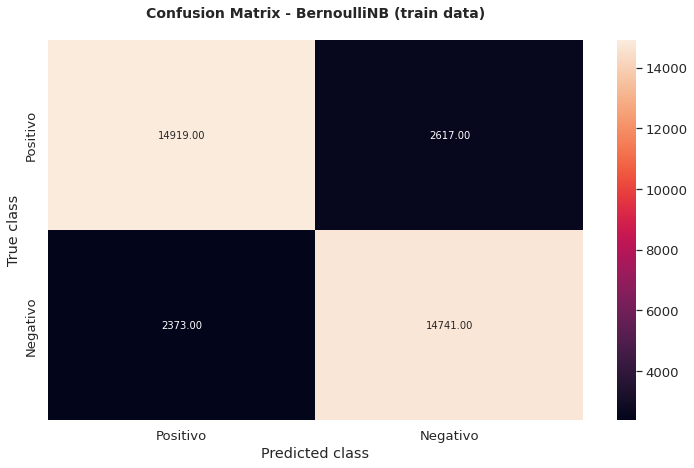

In [159]:
# gráfico da matriz de confusão do modelo "bernoulli_model" com os dados de treino
bernoulli_trainpred = bernoulli_model.predict(X_train)
bernoulli_cm = confusion_matrix(bernoulli_trainpred, y_train)

plt.figure(figsize=(12, 7))
sns.heatmap(bernoulli_cm , annot=True, fmt='.2f', 
            xticklabels=['Positivo', 'Negativo'], 
            yticklabels=['Positivo', 'Negativo'])

plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion Matrix - BernoulliNB (train data)\n', 
          {'fontsize': 14,'fontweight': 'bold'});

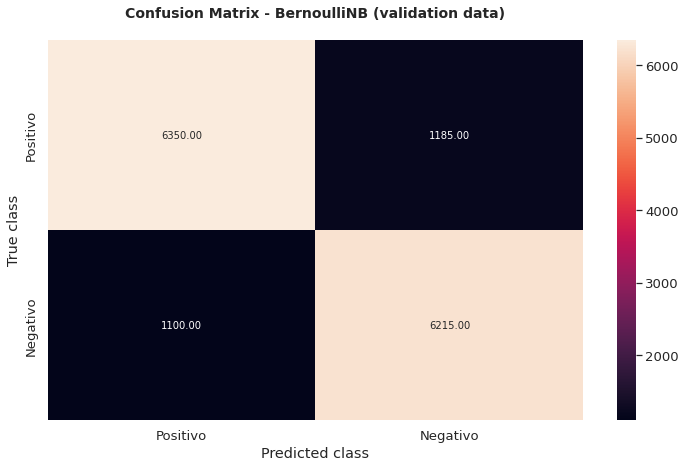

In [160]:
# gráfico da matriz de confusão do modelo "bernoulli_model" com os dados de validação
bernoulli_valpred = bernoulli_model.predict(X_val)
bernoulli_cm = confusion_matrix(bernoulli_valpred, y_val)

plt.figure(figsize=(12, 7))
sns.heatmap(bernoulli_cm , annot=True, fmt='.2f', 
            xticklabels=['Positivo', 'Negativo'], 
            yticklabels=['Positivo', 'Negativo'])

plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion Matrix - BernoulliNB (validation data)\n', 
          {'fontsize': 14,'fontweight': 'bold'});

## **Salvando o modelo**

In [161]:
# biblioteca para salvar o modelo
import pickle

In [162]:
# salvando o modelo
pickle.dump(bernoulli_model, open('model_1.pkl', 'wb'))

## **Aplicando o modelo nos dados de teste**

In [163]:
# visualizando os dados de teste
print(
    data_test.shape, # dimensão do conjunto de dados de teste
    data_test[:20], # visualizando as 20 primeiras linhas
    sep='\n'
)

(500, 2)
                                               review sentiment
0   Probably my all-time favorite movie, a story o...  positive
1   I laughed all the way through this rotten movi...  negative
2   I thought that Mukhsin has been wonderfully wr...  positive
3   No, this hilariously horrible 70's made-for-TV...  positive
4   "A bored television director is introduced to ...  negative
5   I remember seeing this film in the mid 80's th...  positive
6   "The Danish Bladerunner" is boldly stated on t...  negative
7   I watched this movie for the hot guy--and even...  negative
8   Victor McLaglen's performance is one of the fi...  positive
9   What a surprisingly good movie this one turned...  positive
10  Okay, I've watched this movie twice now, I hav...  negative
11  Michael Callan plays a smarmy photographer who...  negative
12  It's rare that I feel a need to write a review...  negative
13  Overall I was rather impressed with the pilot....  positive
14  Emily Watson and Tom Wilkin

In [164]:
# visualizando a distribuição das instâncias da variável alvo
data_test['sentiment'].value_counts(normalize=True) * 100

negative   51.6000
positive   48.4000
Name: sentiment, dtype: float64

In [165]:
# selecionando e visualizando 25 amostras aleatórias do conjunto de dados de teste
text_test = data_test.sample(25)
print(text_test)

# prev = text_test[:1].drop('sentiment', axis=1)
# # print(prev)
# print(prev['review'].values[0])

                                                review sentiment
81   Besides the fact that it was one of the few mo...  positive
338  Julien Hernandez is certainly an attractive an...  negative
213  The Curse of Monkey Island. Released excactly ...  positive
64   I have always said that some plays by their ve...  negative
63   I've just seen this film in a lovely air-condi...  negative
183  Just a stilted rip-off of the infinitely bette...  negative
367  How awful is it? Let me count the ways: 1) It ...  negative
228  It's hard for me to assign the "fair" number o...  positive
177  Even though i am slightly older than the recom...  positive
475  I won't try to speculate as to what Brando was...  positive
471  This absurd movie was about a "Goodie-two-shoe...  negative
310  I have watched 3 episodes of Caveman, and I ha...  negative
337  This film is a complete re-imagining of Romeo ...  positive
207  The only complaint I heard about this film was...  positive
412  The only reason to s

In [166]:
# instanciando e visualizando a primeira linha selecionanda acima
prev = text_test[:1].drop('sentiment', axis=1)
# print(prev)
print(prev['review'].values[0])

Besides the fact that it was one of the few movies that I ever shed a tear over (bye-bye manhood), this is one of the most beautifully crafted Indian films that has ever been made. From the finely crafted sets, to those haunting looks Meena Kumari gives, no one can ever forget it. The music of Pakeezah is amazing, all the more if you can understand the sublime poetry, and is definitely one of those "OMG, 5 minutes another song" movies. You get the feeling of how trapped Sahibjaan is in among all the amazing jewelery she wears and fountained court yard she casually walks past.<br /><br />A parody of all the dreams you've ever had..........


In [167]:
# visualizando o rótulo de classificção
text_test.sentiment.values[0]

'positive'

In [168]:
# instanciando a primeira linha para aplicação da análise do modelo
analysis_text = prev['review'].values[0]
analysis_text

'Besides the fact that it was one of the few movies that I ever shed a tear over (bye-bye manhood), this is one of the most beautifully crafted Indian films that has ever been made. From the finely crafted sets, to those haunting looks Meena Kumari gives, no one can ever forget it. The music of Pakeezah is amazing, all the more if you can understand the sublime poetry, and is definitely one of those "OMG, 5 minutes another song" movies. You get the feeling of how trapped Sahibjaan is in among all the amazing jewelery she wears and fountained court yard she casually walks past.<br /><br />A parody of all the dreams you\'ve ever had..........'

In [169]:
# analisando o texto instanciado acima e visualizando sua classificação
stage_1 = cleaning_text(analysis_text)
stage_2 = remove_characters(stage_1)
stage_3 = lower_up(stage_2)
stage_4 = remove_stopwords(stage_3)
stage_5 = stem_text(stage_4)

bow, words = [], word_tokenize(stage_5)
for word in words:
    bow.append(words.count(word))

word_dict = count_vector.vocabulary_

pickle.dump(word_dict, open('bow.pkl', 'wb'))

inp = []
for i in word_dict:
    inp.append(stage_5.count(i[0]))

y_pred = bernoulli_model.predict(np.array(inp).reshape(1, 6000))
print(f'Predição: {y_pred}',
      f'Real: {text_test.sentiment.values[0]}',
      sep='\n')

Predição: ['positive']
Real: positive


## **Outros**

In [170]:
# visualizando a versão do Python utilizado neste notebook
from platform import python_version
print(f'Versão Python: {python_version()}')

Versão Python: 3.7.12


In [173]:
# instalando a biblioteca "watermark"
!pip install -q -U watermark 
# esse pacote é usado para gravar as versões dos pacotes usados neste notebook

In [174]:
# versões das bibliotecas utilizadas neste notebook
%reload_ext watermark
%watermark -a 'Fernando Galvão | Análise de sentimentos de dados textuais - IMDB Dataset #2021' --iversions

Author: Fernando Galvão | Análise de sentimentos de dados textuais - IMDB Dataset #2021

seaborn   : 0.11.2
IPython   : 5.5.0
nltk      : 3.2.5
numpy     : 1.19.5
re        : 2.2.1
pandas    : 1.1.5
matplotlib: 3.2.2

